In [20]:
import numpy as np

导入dblp数据集，并进行数据预处理，把数据整理成顶点和边的图形式

In [21]:
data_array = np.genfromtxt('dblp_v1.csv', delimiter=' ', dtype=None, encoding=None)

按年份进行划分

In [22]:
year = []
year.append(data_array[0,2])
for i in range(100000):
    exist = 0
    for j in range(len(year)):
        if(data_array[i,2]==year[j]):
            exist = 1
            break
    if(exist==0):
        year.append(data_array[i,2])
year = sorted(year)
print(year)

[1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


原始数据集规模太大，选取前100000行数据进行分析

In [23]:
data_array = data_array[5:100000,:]
index = np.argsort(data_array[:,2])
data_array_sorted = data_array[index]
for i in range(data_array.shape[0]):
    if(data_array_sorted[i,0]==0 or data_array_sorted[i,0]==1 or data_array_sorted[i,1]==0 or data_array_sorted[i,1]==1):
        print("no!!!!!!")
np.savetxt('dblp_v2.csv', data_array_sorted.astype(int), delimiter=' ', fmt='%d')

创建顶点集合数据

In [24]:
vertex_list = []
vertexs = []
j = 0
for i in range(data_array.shape[0]):
    if(data_array_sorted[i,2]!=year[j]):
        vertexs = list(set(vertexs))
        vertexs.sort()
        vertex_list.append(vertexs)
        vertexs = []
        j += 1
    vertexs.append(data_array_sorted[i,0])
    vertexs.append(data_array_sorted[i,1])
vertexs = list(set(vertexs))
vertexs.sort()
vertex_list.append(vertexs)



创建边集合数据并合并

In [25]:
s = "t # 0\n"
s_e = ""
s_v = ""
j = 0

for i in range(data_array.shape[0]):
    if(data_array_sorted[i,2]!=year[j]):
        for p in range(len(vertex_list[j])):
            s_v = s_v + "v {} {}\n".format(vertex_list[j][p],vertex_list[j][p])
        s = s + s_v + s_e + "t # {}\n".format(j+1)
        j += 1
        s_v = ""
        s_e = ""
    s_e = s_e + "e {} {} 2\n".format(data_array_sorted[i][0],data_array_sorted[i][1])


for p in range(len(vertex_list[j])):
    s_v = s_v + "v {} {}\n".format(vertex_list[j][p],vertex_list[j][p])
s = s + s_v + s_e + "t # -1\n"

with open('graph.data', 'w') as file:
    file.write(s)


导入gspan算法实现

In [26]:
from gspan_mining.config import parser
from gspan_mining.main import main

In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


设置最小support为9（为方便展示）

In [28]:
args_str = '-s 9 -p True -l 3 -w True graph.data'
FLAGS, _ = parser.parse_known_args(args=args_str.split())

t # 0
v 0 13912
v 1 13913
v 2 19178
e 0 1 2
e 1 2 2

Support: 9


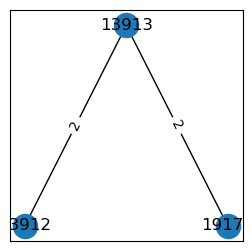

where: [7, 8, 9, 10, 11, 13, 14, 15, 16]

-----------------

t # 1
v 0 13912
v 1 13913
v 2 19178
e 0 1 2
e 0 2 2
e 1 2 2

Support: 9


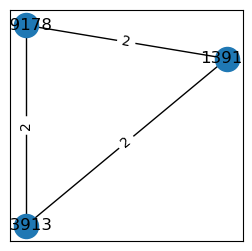

where: [7, 8, 9, 10, 11, 13, 14, 15, 16]

-----------------

t # 2
v 0 13912
v 1 13913
v 2 19178
e 0 1 2
e 0 2 2

Support: 9


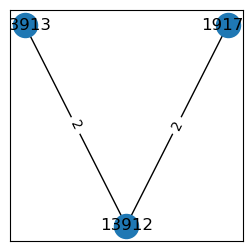

where: [7, 8, 9, 10, 11, 13, 14, 15, 16]

-----------------

t # 3
v 0 13797
v 1 13802
v 2 14721
e 0 1 2
e 1 2 2

Support: 11


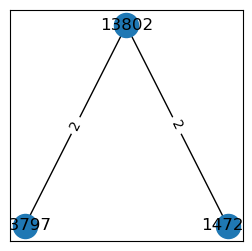

where: [9, 11, 12, 13, 19, 20, 21, 22, 24, 25, 26]

-----------------

t # 4
v 0 13797
v 1 13802
v 2 14722
e 0 1 2
e 1 2 2

Support: 10


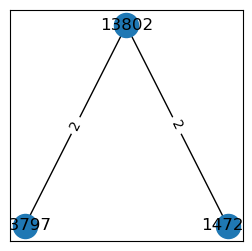

where: [13, 14, 16, 17, 18, 19, 20, 21, 22, 25]

-----------------

t # 5
v 0 13912
v 1 19178
v 2 13913
e 0 1 2
e 1 2 2

Support: 9


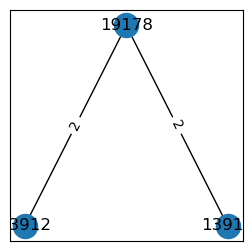

where: [7, 8, 9, 10, 11, 13, 14, 15, 16]

-----------------

t # 6
v 0 21476
v 1 21477
v 2 32263
e 0 1 2
e 1 2 2

Support: 9


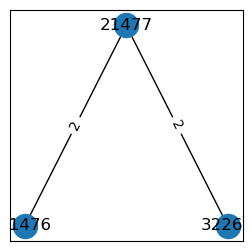

where: [14, 15, 16, 18, 19, 21, 22, 23, 24]

-----------------

t # 7
v 0 21476
v 1 21477
v 2 32263
e 0 1 2
e 0 2 2
e 1 2 2

Support: 9


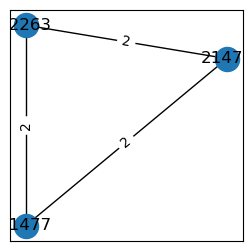

where: [14, 15, 16, 18, 19, 21, 22, 23, 24]

-----------------

t # 8
v 0 21476
v 1 21477
v 2 32263
e 0 1 2
e 0 2 2

Support: 9


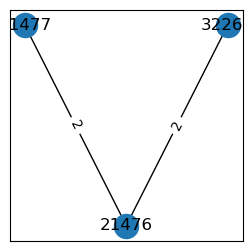

where: [14, 15, 16, 18, 19, 21, 22, 23, 24]

-----------------

t # 9
v 0 14678
v 1 24550
v 2 17269
e 0 1 2
e 1 2 2

Support: 9


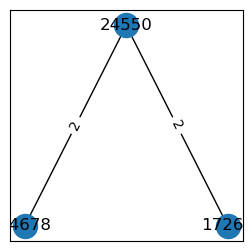

where: [18, 19, 20, 22, 23, 24, 25, 28, 31]

-----------------

t # 10
v 0 13131
v 1 15210
v 2 15941
e 0 1 2
e 1 2 2

Support: 11


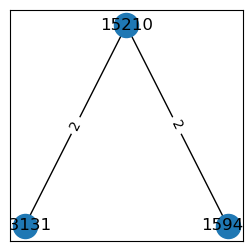

where: [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

-----------------

t # 11
v 0 13131
v 1 15210
v 2 15941
e 0 1 2
e 0 2 2
e 1 2 2

Support: 10


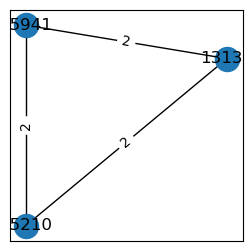

where: [14, 15, 16, 17, 18, 19, 20, 22, 23, 24]

-----------------

t # 12
v 0 13131
v 1 15210
v 2 15941
e 0 1 2
e 0 2 2

Support: 10


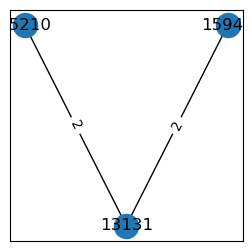

where: [14, 15, 16, 17, 18, 19, 20, 22, 23, 24]

-----------------

t # 13
v 0 13131
v 1 15941
v 2 15210
e 0 1 2
e 1 2 2

Support: 10


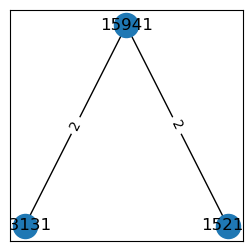

where: [14, 15, 16, 17, 18, 19, 20, 22, 23, 24]

-----------------

t # 14
v 0 21476
v 1 32263
v 2 21477
e 0 1 2
e 1 2 2

Support: 9


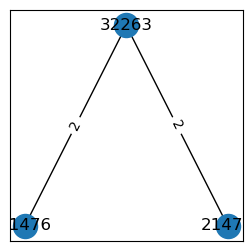

where: [14, 15, 16, 18, 19, 21, 22, 23, 24]

-----------------

t # 15
v 0 13130
v 1 15210
v 2 13131
e 0 1 2
e 1 2 2

Support: 9


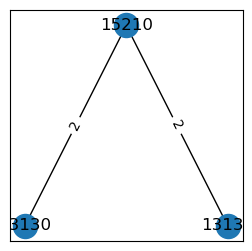

where: [32, 18, 19, 20, 21, 22, 23, 24, 31]

-----------------

t # 16
v 0 14678
v 1 17269
v 2 24550
e 0 1 2
e 1 2 2

Support: 9


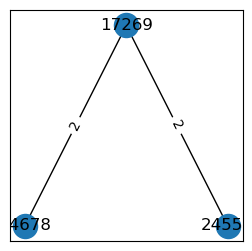

where: [18, 19, 20, 22, 23, 24, 25, 28, 31]

-----------------

t # 17
v 0 14678
v 1 17269
v 2 24550
e 0 1 2
e 0 2 2
e 1 2 2

Support: 9


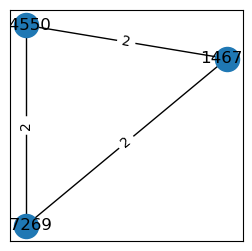

where: [18, 19, 20, 22, 23, 24, 25, 28, 31]

-----------------

t # 18
v 0 14678
v 1 17269
v 2 24550
e 0 1 2
e 0 2 2

Support: 9


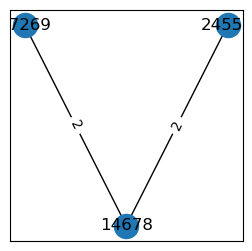

where: [18, 19, 20, 22, 23, 24, 25, 28, 31]

-----------------

Read:	0.27 s
Mine:	3.04 s
Total:	3.31 s


In [29]:
gs = main(FLAGS)